## **AFROBEATS Recommendation System Using Spotify Api**

#### *Our objective is to build an Afrobeat Music Recommendation System using the Spotify API*

#### To build a Music Recommendation System using the Spotify API, we are required to collect real-time music data from Spotify. For this task, we need a Spotify developer account to get our credentials from Spotify to access their data.

#### Below is the process you can follow to sign up for the Spotify developer account and get your credentials.

**Step 1**: Create a Spotify Account

**Step 2**: Go to Your Spotify Developer Dashboard

**Step 3**: Create An App

**Step 4**: App Description

**Step 5**: Copy Your Client ID and Client Secret

#### **You can find a detailed guide to get your credentials** : 

*https://developer.spotify.com/documentation/web-api*

In [1]:
import requests
import base64
import pandas as pd

#### **Replace with your own Client ID and Client Secret**

In [41]:
CLIENT_ID = 'moezeez_client_id'
CLIENT_SECRET = 'moezeez_client_secret'

#### **Base64 encoding the client ID and client secret**

In [3]:
client_credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

#### **Requesting the access token**

In [4]:
token_url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization': f'basic {client_credentials_base64.decode()}'
}

data = {
    'grant_type': 'client_credentials'
}

In [5]:
response = requests.post(token_url, data=data, headers=headers)

In [6]:
if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained successfully.")
else:
    print("Error obtaining access token.")
    exit()

Access token obtained successfully.


In [7]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth

#### **Setting up Spotipy with the access token**

In [8]:
sp = spotipy.Spotify(auth=access_token)

#### **Getting Afrobeats tracks**

In [9]:
results = sp.search(q='genre:afrobeat', type='track', limit=50, offset=0)
tracks = results['tracks']['items']
track_details = []

#### **Extracting relevant informations and storing in a list of dictionaries**

In [10]:
for track in tracks:
        
    track_id = track['id']
    audio_features = sp.audio_features(track_id)[0] if track_id != 'Not available' else None


    audio_features = sp.audio_features(track_id)[0] if track_id != 'Not available' else None

    track_info = {
        'Track Name': track['name'],
        'Artists': ', '.join(artist['name'] for artist in track['artists']),
        'Album Name': track['album']['name'],
        'Album ID': track['album']['id'],
        'Track ID': track_id,
        'Popularity': track['popularity'],
        'Release Date': track['album']['release_date'],
        'Duration': track['duration_ms'],
        'Duration (ms)': audio_features['duration_ms'] if audio_features else None,
        'Danceability': audio_features['danceability'] if audio_features else None,
        'Energy': audio_features['energy'] if audio_features else None,
        'Key': audio_features['key'] if audio_features else None,
        'Loudness': audio_features['loudness'] if audio_features else None,
        'Mode': audio_features['mode'] if audio_features else None,
        'Speechiness': audio_features['speechiness'] if audio_features else None,
        'Acousticness': audio_features['acousticness'] if audio_features else None,
        'Instrumentalness': audio_features['instrumentalness'] if audio_features else None,
        'Liveness': audio_features['liveness'] if audio_features else None,
        'Valence': audio_features['valence'] if audio_features else None,
        'Tempo': audio_features['tempo'] if audio_features else None,
    }

    track_details.append(track_info)

#### **Creating a pandas DataFrame from the list of dictionaries**

In [11]:
Afrobeats_df = pd.DataFrame(track_details)

#### **previewing the dataframe**

In [13]:
Afrobeats_df.head()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,No White Flags,"Show Dem Camp, Rotex, Phlow","Clone Wars Vol. IV ""These Buhari Times""",5tld8qNFxugTOCFV1OyRBC,5Ap1b3aoFCg3Fn95IQMd0s,12,2019-01-01,258876,258876,0.739,0.656,8,-6.625,0,0.4140,0.59700,0.000000,0.1070,0.482,88.856
1,All the Time,Jlyricz,The Banquet +,0blnjNenki5vd9LHyZiuEf,5PL1lPnjAFSBrnAolaHBST,5,2021-06-25,160000,160000,0.716,0.508,5,-10.634,0,0.0419,0.48400,0.000053,0.1890,0.739,97.035
2,Akale Wube,Qwanqwa,Volume One,3JclC3vi49IUd5HPZAbGrN,00hi00y2BHCmC0wjYhjHhx,2,2014-06-25,321991,321991,0.531,0.665,1,-12.619,0,0.0647,0.47500,0.890000,0.1190,0.949,155.388
3,Never (Lagos Never Gonna Be the Same),"Tony Allen, Hugh Masekela",Never (Lagos Never Gonna Be the Same / Slow Bo...,5NI8FwReDCWBqCZAs45q3v,7stg7YgcYEknodWRkBVjig,0,2020-03-17,233680,233680,0.766,0.742,5,-8.458,1,0.0428,0.17800,0.020000,0.0916,0.614,100.024
4,Eko,Fela Kuti,The '69 Los Angeles Sessions,7oa9sHVeCHVB6LKEOt5BId,2JrltzXBM1e90LJuL5yvKX,22,1994-01-01,255093,255093,0.364,0.872,5,-5.804,1,0.1720,0.00695,0.285000,0.0679,0.910,189.689


In [32]:
Afrobeats_df.tail()

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
45,Alter do Chão,Manoel Cordeiro,Guitar Hero Brasil,73mVWujlPgUfda2Foh1fY6,5O2J2CxwlVRtdaktdqKHJ5,1,2019-08-30,218080,218080,0.694,0.803,4,-8.735,0,0.0435,0.792000,0.948000,0.1730,0.722,100.006
46,Aranbada,9ice,Aranbada,6pn4ixBHMEphAUvu3wpyrB,3tQCwiKgZJ5flgz9h77Ir4,0,2021-02-21,238470,238471,0.787,0.456,6,-9.610,0,0.1100,0.807000,0.000025,0.1520,0.848,95.058
47,Emmah,"African China, Bizzy Brain","Letter To Mr President, Vol. 1",5LYJh4psGWD8hIicfNxwKE,4axOeo9rWNd1iyitVJLXrj,0,2018-06-01,251560,251560,0.637,0.956,9,-1.164,1,0.3500,0.069300,0.000000,0.0348,0.889,127.566
48,Aphasia,The Budos Band,"Daptone Gold, Vol. II",41LOWzQMg0Yw7vWQlSy0DG,4ita8yJqAvd7JXKw9uiOqv,1,2015-09-15,257640,257640,0.454,0.877,11,-5.640,1,0.0278,0.000006,0.785000,0.0825,0.712,87.025
49,Different (feat. Damian Marley & Angelique Kidjo),"Burna Boy, Angelique Kidjo, Damian Marley",African Giant,34vlTd4355ddD4q9pPsoqF,6F5bERiTAIAVAP8ZUh0tqE,41,2019-07-25,196356,196356,0.603,0.648,8,-5.728,0,0.5000,0.092400,0.000000,0.3340,0.486,87.442


In [15]:
Afrobeats_df.columns

Index(['Track Name', 'Artists', 'Album Name', 'Album ID', 'Track ID',
       'Popularity', 'Release Date', 'Duration', 'Duration (ms)',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
      dtype='object')

In [16]:
Afrobeats_df.shape

(50, 20)

In [17]:
Afrobeats_df.describe()

,Popularity,Duration,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000
mean,9.760000,239333.740000,239334.160000,0.643260,0.717540,6.300000,-7.229900,0.540000,0.138494,0.338906,1.080058e-01,0.176138,0.664520,122.611940
std,12.714382,91470.430479,91470.458117,0.172781,0.120054,3.052266,2.428369,0.503457,0.126541,0.271772,2.594588e-01,0.167520,0.244206,36.984269
min,0.000000,14933.000000,14933.000000,0.000000,0.456000,0.000000,-12.619000,0.000000,0.000000,0.000006,0.000000e+00,0.034800,0.000000,0.000000
25%,0.000000,194390.250000,194390.250000,0.543000,0.642750,5.000000,-8.516500,0.000000,0.046850,0.072750,3.900000e-07,0.091975,0.487000,99.903250
50%,4.500000,241635.000000,241635.500000,0.662000,0.719500,7.000000,-6.938500,1.000000,0.080900,0.343000,9.130000e-05,0.111500,0.708500,115.029500
75%,15.000000,261538.500000,261539.250000,0.779500,0.813500,8.000000,-5.747000,1.000000,0.170000,0.515500,4.407500e-03,0.184250,0.880500,147.779250
max,55.000000,570805.000000,570805.000000,0.884000,0.956000,11.000000,-1.164000,1.000000,0.500000,0.898000,9.480000e-01,0.931000,0.971000,200.806000


In [18]:
Afrobeats_df.isnull().sum()

Track Name          0
Artists             0
Album Name          0
Album ID            0
Track ID            0
Popularity          0
Release Date        0
Duration            0
Duration (ms)       0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
dtype: int64

### **Visualization of our data**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#### **Distribution of popularity**

Text(0.5, 1.0, 'Popularity Distribution')

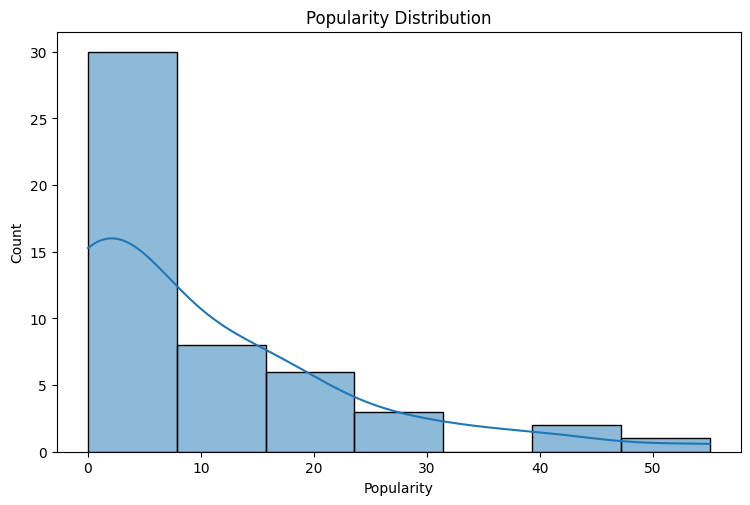

In [20]:
plt.figure(figsize=(30, 12))
plt.subplot(2, 3, 1)
sns.histplot(Afrobeats_df['Popularity'], kde=True)
plt.title('Popularity Distribution')

#### **Scatterplot**

Text(0.5, 1.0, 'Danceability vs. Energy')

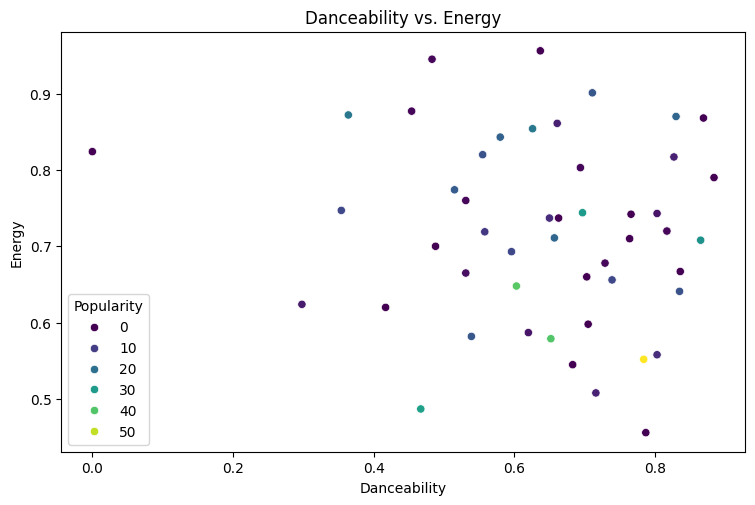

In [21]:
plt.figure(figsize=(30, 12))
plt.subplot(2, 3, 2)
sns.scatterplot(data=Afrobeats_df, x='Danceability', y='Energy', hue='Popularity', palette='viridis')
plt.title('Danceability vs. Energy')

#### **Pair Plot**

<Figure size 3000x1200 with 0 Axes>

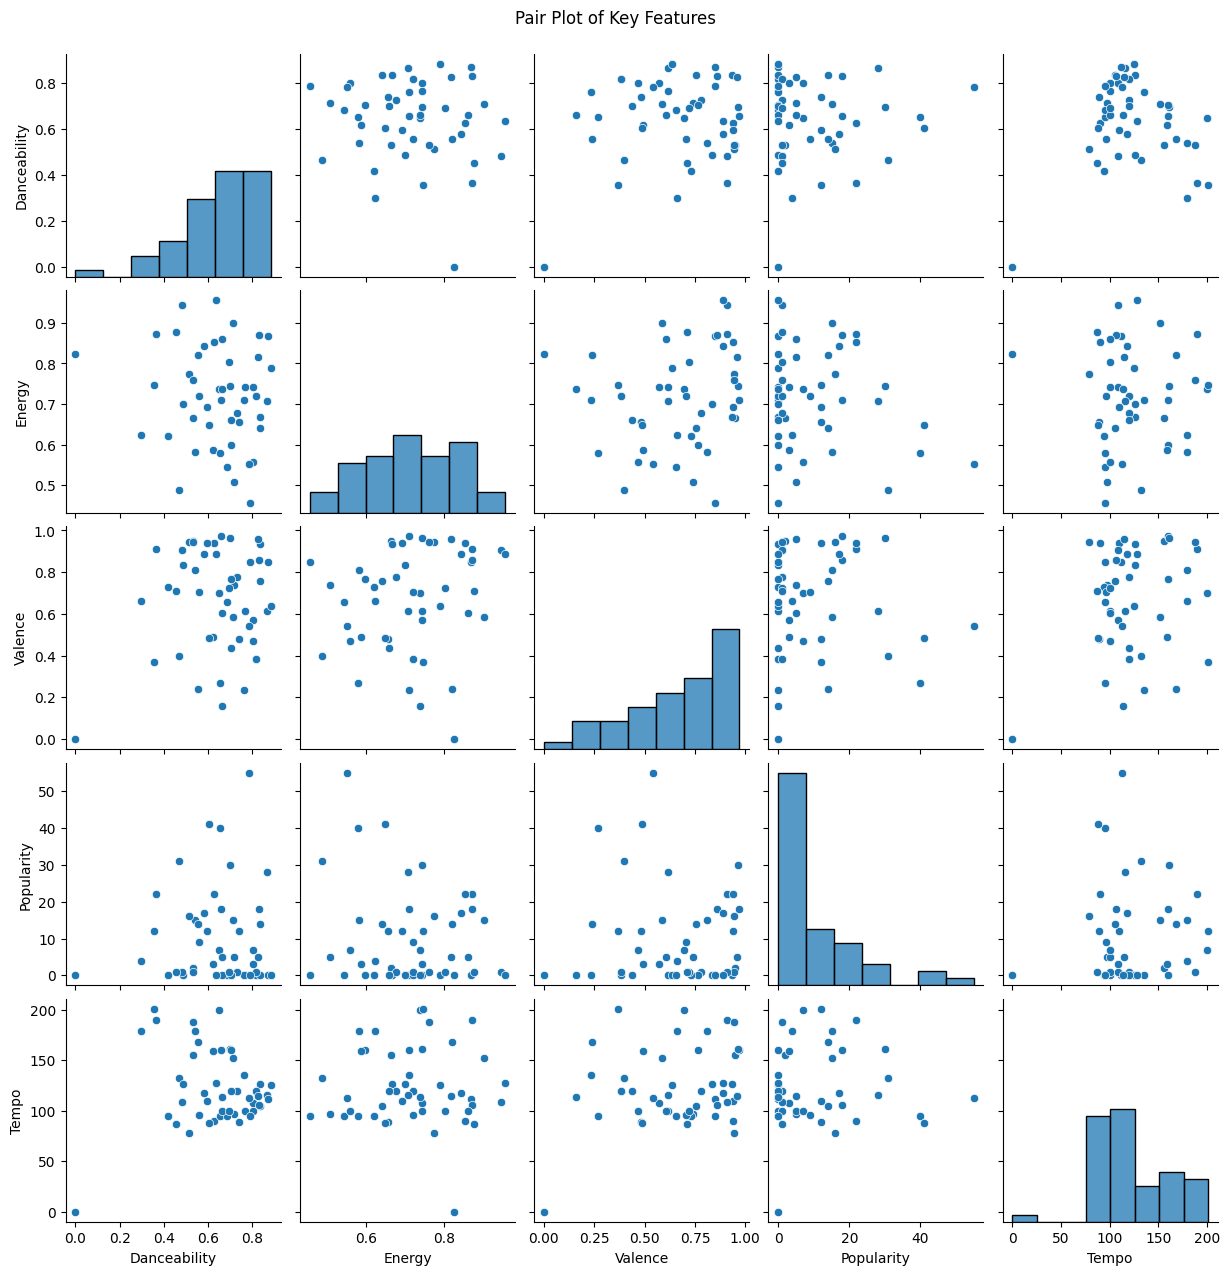

In [22]:
plt.figure(figsize=(30, 12))
sns.pairplot(Afrobeats_df[['Danceability', 'Energy', 'Valence', 'Popularity', 'Tempo']])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

#### **3D Scatter Plot**

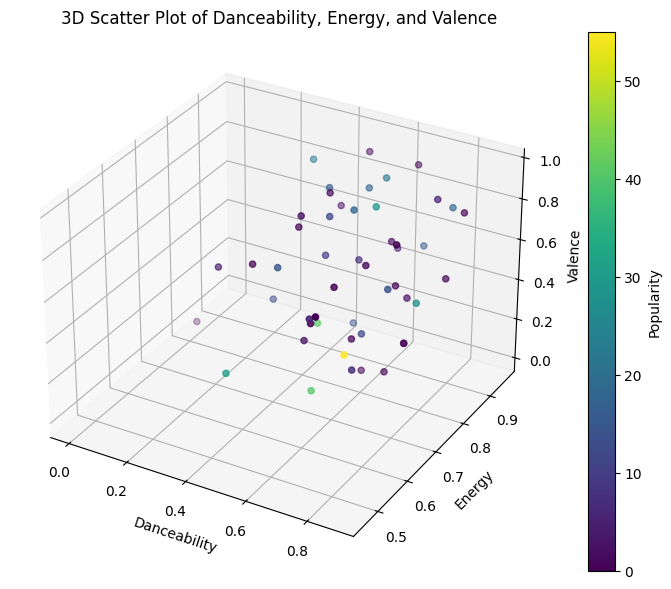

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Afrobeats_df['Danceability'], Afrobeats_df['Energy'], Afrobeats_df['Valence'], c=Afrobeats_df['Popularity'], cmap='viridis')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Valence')
ax.set_title('3D Scatter Plot of Danceability, Energy, and Valence')
fig.colorbar(scatter, ax=ax, label='Popularity')
plt.show()

### **Building the recommendation system**

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity

#### **Creating a function to calculate weighted popularity scores based on release date**

In [34]:
def calculate_weighted_popularity(release_date):
    release_date = datetime.strptime(release_date, '%Y-%m-%d')

    time_span = datetime.now() - release_date

    weight = 1 / (time_span.days + 1)
    return weight

#### **Normalizing the music features using Min-Max scaling**

In [35]:
scaler = MinMaxScaler()
music_features = Afrobeats_df[['Danceability', 'Energy', 'Key', 
                           'Loudness', 'Mode', 'Speechiness', 'Acousticness',
                           'Instrumentalness', 'Liveness', 'Valence', 'Tempo']].values

In [36]:
music_features_scaled = scaler.fit_transform(music_features)

#### **Creating a function to get content-based recommendations based on music features**

In [37]:
def Afrobeats_content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in Afrobeats_df['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    input_song_index = Afrobeats_df[Afrobeats_df['Track Name'] == input_song_name].index[0]

    similarity_scores = cosine_similarity([music_features_scaled[input_song_index]], music_features_scaled)

    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    Afrobeats_content_based_recommendations = Afrobeats_df.iloc[similar_song_indices][['Track Name', 'Artists', 'Album Name', 'Release Date', 'Popularity']]

    return Afrobeats_content_based_recommendations

#### **Creating a function to get hybrid recommendations based on weighted popularity**

In [38]:
def hybrid_recommendations(input_song_name, num_recommendations=5, alpha=0.5):
    if input_song_name not in Afrobeats_df['Track Name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    content_based_rec = Afrobeats_content_based_recommendations(input_song_name, num_recommendations)

    popularity_score = Afrobeats_df.loc[Afrobeats_df['Track Name'] == input_song_name, 'Popularity'].values[0]

    weighted_popularity_score = popularity_score * calculate_weighted_popularity(Afrobeats_df.loc[Afrobeats_df['Track Name'] == input_song_name, 'Release Date'].values[0])

    hybrid_recommendations = content_based_rec
    append =  {
        'Track Name': input_song_name,
        'Artists': Afrobeats_df.loc[Afrobeats_df['Track Name'] == input_song_name, 'Artists'].values[0],
        'Album Name': Afrobeats_df.loc[Afrobeats_df['Track Name'] == input_song_name, 'Album Name'].values[0],
        'Release Date': Afrobeats_df.loc[Afrobeats_df['Track Name'] == input_song_name, 'Release Date'].values[0],
        'Popularity': weighted_popularity_score
    }
    
    appendToDf = pd.DataFrame([append])
    hybrid_recommendations = pd.concat([hybrid_recommendations, appendToDf], ignore_index=True)


    hybrid_recommendations = hybrid_recommendations.sort_values(by='Popularity', ascending=False)
    hybrid_recommendations = hybrid_recommendations[hybrid_recommendations['Track Name'] != input_song_name]


    return hybrid_recommendations

### **Testing the Functions**

In [39]:
input_song_name = "Eko"
recommendations = Afrobeats_content_based_recommendations(input_song_name, 5)
print(f"content based recommended songs for '{input_song_name}':")
recommendations

content based recommended songs for 'Eko':


,Track Name,Artists,Album Name,Release Date,Popularity
43,Won da Mo,"Burna Boy, D'banj",Won da Mo,2013-12-09,15
42,Tuff Skin Girl,Wendy Shay,Tuff Skin Girl,2020-01-17,9
47,Emmah,"African China, Bizzy Brain","Letter To Mr President, Vol. 1",2018-06-01,0
39,Su Sonrisa,Thee Commons,Loteria Tribal,2016-04-30,4
24,No Mind Dem,Ice Prince,Jos To The World,2016-10-28,12


In [40]:
input_song_name = "All My Life - feat. Oxlade"
recommendations = hybrid_recommendations(input_song_name, 5)
print(f"Hybrid recommended songs for '{input_song_name}':")
recommendations

Hybrid recommended songs for 'All My Life - feat. Oxlade':


,Track Name,Artists,Album Name,Release Date,Popularity
1,Douga,Orchestra Baobab,Tribute to Ndiouga Dieng,2017-03-31,15.0
4,No Mind Dem,Ice Prince,Jos To The World,2016-10-28,12.0
3,Tuff Skin Girl,Wendy Shay,Tuff Skin Girl,2020-01-17,9.0
0,Karishika,"Falz, Phyno, Chigurl",Karishika Part 2,2015-09-04,5.0
2,L' Amour Malade Petit Francais,Francis Bebey,L'Amour Malade Petit - Francais,1982-01-01,0.0


### **Conclusion**

#### Building a Music Recommendation System using the Spotify API allows us to harness rich music metadata and user data to create personalized recommendations. This enhances user experience and engagement by delivering timely and relevant music suggestions, making the system a powerful tool for music discovery.